In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def MAE_loss(e):
    return np.mean(np.abs(e))
    
def MSE_loss(e):
    return np.dot(e, e)/(2*e.shape[0])

def compute_loss(y, tx, w, MSE=True):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE : y - Xw (matrix form)
    e = y-np.dot(tx,w)
    
    if MSE:
        return MSE_loss(e)
    
    return MAE_loss(e)
    
    # ***************************************************

In [5]:
## Test of compute_loss
w = np.array([1,2]) 
%timeit compute_loss(y,tx,w)
compute_loss(y,tx,w)

53 µs ± 3.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


2694.483365887084

# 2 Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for idx0, ele0 in enumerate(w0):
        for idx1, ele1 in enumerate(w1):
            losses[idx0,idx1] = compute_loss(y,tx,np.array([ele0,ele1]))
    # ***************************************************

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.793541019523236, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.138 seconds


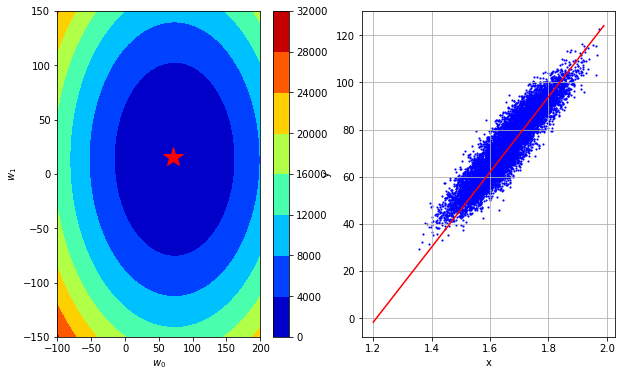

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50) # linspace = # points in interval

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

In [ ]:
# computational cost : (O^2)
intervals = np.linspace(2, 102, 50)
execution_times = []

for inter in intervals:
    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=inter)

    # Start the grid search
    start_time = datetime.datetime.now()
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)

    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    end_time = datetime.datetime.now()
    execution_time = (end_time - start_time).total_seconds()
    execution_times.append(execution_time)
    # Print the results
    print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
          l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))
    # Plot the results
#     fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
#     fig.set_size_inches(10.0,6.0)
    #fig.savefig("grid_plot")  # Optional saving
    
plt.plot(intervals, execution_times)
plt.show()

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    e = y-np.dot(tx,w)
    return -np.dot(tx.T,e)/(y.shape[0])
    
    # ***************************************************


In [9]:
print(compute_gradient(y,tx,np.array([100,20])))
print(compute_gradient(y,tx,np.array([50,10])))

[26.706078    6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        loss = compute_loss(y,tx,w)
        
        # update w by gradient
        w = w - gamma*compute_gradient(y,tx,w)
        # ***************************************************
       
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759167, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(1/49): loss=265.30246210896195, w0=66.69746902191565, w1=12.266538315840034
Gradient Descent(2/49): loss=37.87837955044161, w0=71.31498610804833, w1=13.115760199244338
Gradient Descent(3/49): loss=17.410212120174496, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450457, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265291, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136332, w1=13.476764421879517
Gradient Descent(7/49): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638305, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412119, w1=13.4

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [17]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # implement stochastic gradient computation.It's same as the gradient descent.
    return compute_gradient(y,tx,w)
    # ***************************************************



def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # implement stochastic gradient descent.
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        
        [(minibatch_y, minibatch_tx)] = list(batch_iter(y, tx, batch_size))
        
        loss = compute_loss(minibatch_y,minibatch_tx,w)
        
            # update w by sotchastic gradient
        w = w - gamma*compute_gradient(minibatch_y,minibatch_tx,w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [18]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2386.0042480717048, w0=48.355807956338296, w1=10.558558681057054
Gradient Descent(1/49): loss=208.5750019627634, w0=62.652783228174926, w1=16.003263323407722
Gradient Descent(2/49): loss=60.668251564525484, w0=70.36348271221883, w1=23.71091633897955
Gradient Descent(3/49): loss=0.0025328425024865255, w0=70.31366117418118, w1=23.68837236240771
Gradient Descent(4/49): loss=48.3363058386711, w0=77.19621736515396, w1=15.293448923002979
Gradient Descent(5/49): loss=8.497973219960096, w0=80.08204718611722, w1=16.58076201185187
Gradient Descent(6/49): loss=86.16463832047451, w0=70.89284996579025, w1=-2.232075533762398
Gradient Descent(7/49): loss=127.22283694303482, w0=59.726902616632, w1=13.699325073658818
Gradient Descent(8/49): loss=41.14951890075918, w0=66.07721981522484, w1=7.802185518186636
Gradient Descent(9/49): loss=176.00746997771915, w0=79.21066264557837, w1=22.19795381238658
Gradient Descent(10/49): loss=0.09782243688542712, w0=79.52028497705288, w1=22

In [19]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

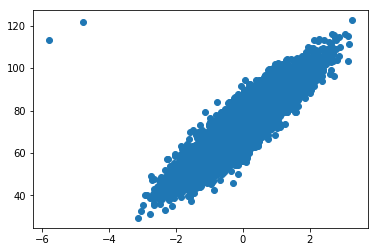

In [21]:
height, weight, gender = load_data(sub_sample=False, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(tx[:,1],y)

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)